# Organizing and Counting Image Files in Subfolders
Description:
This code is designed to navigate through a main directory on your computer to identify and count the number of image files in each of its subdirectories. Here's a simplified breakdown:

Preparation: The code first imports necessary libraries. Think of this as setting up the toolbox.

Target Directory: It specifies the main folder it will scan. This is like choosing the starting point for a search operation.

Identify Subfolders: The code lists all the subfolders within the main folder. Imagine this as identifying all the drawers in a filing cabinet.

Initialize Storage: An empty list is created to store the findings, similar to preparing a blank sheet for note-taking.

Loop Through Subfolders: The code goes through each subfolder one by one. It ignores a specific folder named .ipynb_checkpoints, which is generally not relevant to the task.

Name Identification: For each subfolder, the code records its name, essentially labeling each drawer in our filing cabinet analogy.

Image Count: Within each subfolder, the code counts the number of image files, specifically those with .png or .jpg extensions.

Record Findings: The name of the subfolder and the number of images found are added to the list, like jotting down notes.

Create Summary Table: Finally, the code converts the list into a table (DataFrame) for easier viewing and analysis, and then displays this table.

By the end, you get a neat table that tells you the name of each subfolder and how many image files are in it.

In [ ]:
import os
import pandas as pd

# Define the path to the folder
path = '/content/drive/MyDrive/pbc_subset_v2'

# Get a list of all subfolders in the folder
subfolders = [f.path for f in os.scandir(path) if f.is_dir()]

# Initialize a list to store the results
results = []

# Loop over the subfolders
for subfolder in subfolders:

  if os.path.basename(subfolder) == '.ipynb_checkpoints':
        continue
    # Get the folder name as class

  class_name = os.path.basename(subfolder)
  # Get a list of all images in the subfolder
  images = [f for f in os.listdir(subfolder) if f.endswith('.png') or f.endswith('.jpg')]
  # Get the number of images in the subfolder
  num_images = len(images)
  # Add the class name and number of images to the results list
  results.append([class_name, num_images])

# Convert the results list to a Pandas dataframe
df = pd.DataFrame(results, columns=['Class', 'Number of Images'])

# Print the dataframe
print(df)

          Class  Number of Images
0            ig              1200
1  erythroblast              1200
2      platelet              1200
3    neutrophil              1200
4    lymphocyte              1202
5      monocyte              1289
6    eosinophil              1373
7      basophil              1200


# Displaying Random Images from Different Categories
Description:
This code is like a mini art gallery curator that picks one random image from different categories and displays them all together in a grid. Here's how it works:

Setting Up the Tools: The code starts by importing the necessary libraries. matplotlib is for plotting, random is for picking random files, os is for file operations, and cv2 is for image processing.

Defining Categories and Location: The code specifies the categories (or classes) of images it will look for, like 'monocyte', 'lymphocyte', etc. It also knows where to find these images on your computer.

Prepare the Canvas: It sets up a grid where the images will be displayed. Imagine this as setting up frames on a wall.

Loop Through Categories: The code then goes through each category one by one.

Pick a Random Image: In each category, it picks a random image. Think of this as randomly picking one painting from a collection.

Read and Convert Image: It reads the chosen image file and converts it to a format that can be displayed (RGB format).

Place the Image: The image is then placed in the grid, and its category name is set as the title.

Hide Grid Lines: The code removes any axis lines to make the display cleaner.

Show the Gallery: Finally, all the selected images are displayed together in a grid layout.

By the end, you'll see a 2x4 grid displaying one random image from each of the specified categories, making it easier to visualize the different types of images you have in your dataset.

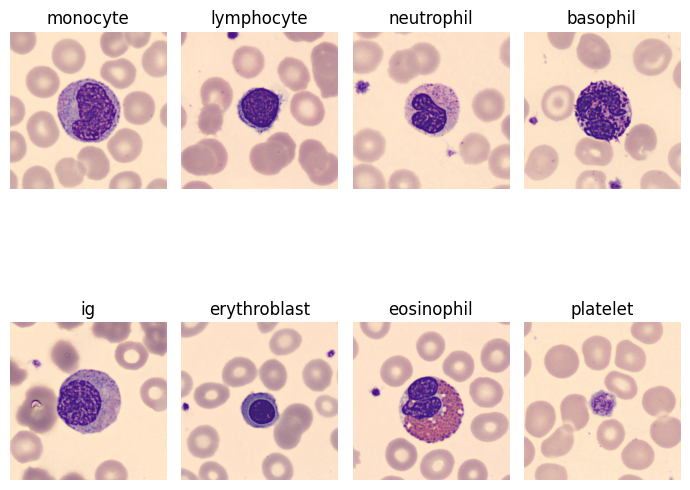

In [ ]:
import matplotlib.pyplot as plt
import random
import os
import cv2

classes = ['monocyte', 'lymphocyte', 'neutrophil', 'basophil', 'ig', 'erythroblast', 'eosinophil', 'platelet']
base_path = '/content/drive/MyDrive/pbc_subset_v2'

fig, axs = plt.subplots(2, 4, figsize=(7, 7))

for i, cls in enumerate(classes):
  class_path = os.path.join(base_path, cls)
  random_image = random.choice(os.listdir(class_path))
  image_path = os.path.join(class_path, random_image)
  image = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB) # Convert image to RGB format
  axs[i//4, i%4].imshow(image)
  axs[i//4, i%4].set_title(cls)
  axs[i//4, i%4].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
classes = ['basophil',
 'eosinophil',
 'erythroblast',
 'ig',
 'lymphocyte',
 'monocyte',
 'neutrophil',
 'platelet']

# Preparing and Preprocessing Image Data for Machine Learning
Description:
This code is like a meticulous chef who gathers ingredients (images) from different categories, chops and scales them to the right size, and prepares them for cooking (machine learning). Here's how it works:

Import Libraries: The code starts by importing the necessary Python libraries. These include os for file operations, cv2 for image processing, numpy for numerical operations, and various modules from sklearn and tensorflow for machine learning.

Specify Data Location and Categories: The code sets the path to the folder containing the image data and defines the categories (like 'monocyte', 'lymphocyte', etc.) it will work with.

Initialize Data Storage: Two empty lists, data and labels, are created. The data list will store the processed images, and the labels list will store the category each image belongs to.

Loop Through Categories: The code goes through each category one by one.

Read and Resize Images: For each image in a category, the code reads the image file and resizes it to a standard size of 224x224 pixels.

Normalize the Image: The pixel values of the image are scaled down to a range between 0 and 1. This is like standardizing the ingredients before cooking.

Store Processed Data: The processed image is added to the data list, and its corresponding category index is added to the labels list.

By the end, you have a data list containing all the processed images and a labels list containing the category each image belongs to. These lists are now ready to be used for training a machine learning model.

In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Set the path to the dataset
data_path = '/content/drive/MyDrive/pbc_subset_v2'

# Define the classes
classes = ['monocyte', 'lymphocyte', 'neutrophil', 'basophil', 'ig', 'erythroblast', 'eosinophil', 'platelet']

# Load and preprocess the data
data = []
labels = []
for i, cls in enumerate(classes):
    class_path = os.path.join(data_path, cls)
    for img_name in os.listdir(class_path):
        img_path = os.path.join(class_path, img_name)
        img = cv2.imread(img_path)
        img = cv2.resize(img, (224,224))
        img = img.astype('float32') / 255
        data.append(img)
        labels.append(i)

# Converting Lists to Numpy Arrays
Description:
After gathering and preparing all the images and their corresponding categories, the code takes one final step before they're ready for machine learning.

Convert to Numpy Arrays: The lists data and labels, which hold the processed images and their categories, are converted to Numpy arrays. Think of this as putting all your prepared ingredients into specific cooking pots that the machine learning model prefers.

By doing this, the data becomes more efficient to work with and is now in the optimal format for training machine learning algorithms.

In [ ]:
# Convert the data and labels to numpy arrays
data = np.array(data)
labels = np.array(labels)

# One-Hot Encoding of Labels
Description:
Before feeding the data into a machine learning model, there's one more preparation step.

One-Hot Encoding: The code converts the labels array into a "one-hot encoded" format using the to_categorical function. In simple terms, this is like translating the category names into a language that the machine learning model can understand more easily.

For example, if there are 3 classes ('apple', 'banana', 'cherry'), instead of representing them as 0, 1, and 2, one-hot encoding would represent them as [1, 0, 0], [0, 1, 0], and [0, 0, 1].

By doing this, the labels are now in a format that's ideal for training classification models, making it easier for the model to understand the different categories.

In [ ]:
# One-hot encoding
labels = to_categorical(labels, num_classes=len(classes))

# Splitting Data into Training, Testing, and Validation Sets
Description:
Once all the images and labels are prepared, the code takes another important step to ensure the machine learning model will be well-trained and evaluated.

Data Splitting: The code uses the train_test_split function to divide the dataset into different parts:

Training and Testing Split: Initially, 80% of the data is set aside for training the model, and the remaining 20% is used for testing it. This is like setting aside a portion of your ingredients to taste-test the final dish.

Training and Validation Split: The training data is further split, with 80% remaining for actual training and 20% set aside for validation. Validation data helps fine-tune the model during training, acting like a "practice quiz" before the final test.

By doing this, the code ensures that there are separate datasets for training, validating, and testing the model, which is crucial for building a reliable and robust machine learning model.

In [ ]:
# Split the data into training, testing, and validation sets
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.20, random_state=42)
train_data, val_data, train_labels, val_labels = train_test_split(train_data, train_labels, test_size=0.2, random_state=42)

# Building and Training a Customized Deep Learning Model with Data Augmentation Using DenseNet169
Description:
This code is akin to a master chef who not only prepares the ingredients but also fine-tunes the oven settings for baking the perfect dish. It builds and trains a deep learning model using TensorFlow and Keras, specifically leveraging a pre-trained model called DenseNet169. Here's how it works:

Import Libraries: The code starts by importing the necessary TensorFlow and Keras modules for building and training the model.

Load Pre-trained Model: It uses DenseNet169, a pre-trained model with 169 layers, as the base. This is like using a tried-and-true recipe as a starting point.

Unfreeze Layers: DenseNet169 has a total of 169 layers, and the code makes the last 25 of these layers trainable while freezing the rest. This is akin to customizing a well-established recipe to better suit your specific needs.

Input Layer: It defines the shape of the input data, which is images of size 224x224 pixels with 3 color channels (RGB).

Data Augmentation: The code randomly flips and rotates the images to make the model more robust. Think of this as adding variations to the recipe for a fuller flavor profile.

Center Cropping: It crops the center of the augmented images to ensure they are of uniform size.

Base Model Integration: The augmented and cropped images are then passed through the base model, specifically through the 25 unfrozen layers to capture more specialized features.

Global Average Pooling: This step reduces the dimensions of the feature maps outputted by the base model, making it easier to process.

Output Layer: A dense layer with 8 output units and a softmax activation function is added. This is like specifying the final presentation of the dish.

Learning Rate Schedule: The code defines a custom learning rate schedule, adjusting how fast the model learns as it goes through epochs (training cycles).

Compile the Model: The model is compiled using the Adam optimizer and a categorical cross-entropy loss function.

Train the Model: Finally, the model is trained using the training and validation data for 15 epochs, with a batch size of 32. A learning rate scheduler is also used as a callback to adjust the learning rate during training.

By the end of this process, you'll have a trained model that's customized to classify images into one of the 8 specified categories. The model leverages the power of DenseNet169 but is fine-tuned to your specific dataset by unfreezing and training the last 25 layers.

# Training Results of the Customized Deep Learning Model Using DenseNet169
Description:
The output shows the results of training the customized deep learning model, which is based on the DenseNet169 architecture. The model was fine-tuned by unfreezing the last 25 layers out of the total 169 layers in DenseNet169. Here's a breakdown of the training epochs and their outcomes:

Downloading Pre-trained Model: The DenseNet169 model with pre-trained weights is downloaded. This serves as the foundational architecture for the customized model.

Epochs: The model is trained for 15 cycles (epochs). Each epoch represents one complete pass through the entire training dataset.

Metrics: For each epoch, the output shows the following metrics:

Loss: Represents how well the model is performing. Lower is better.
Accuracy: Indicates the percentage of correctly classified images in the training set.
Val_loss: The loss on the validation set, which is a subset of the training data used to fine-tune the model.
Val_accuracy: The accuracy on the validation set, indicating how well the model generalizes to new data.
lr: The learning rate, which controls how much the model is updated during training.
Learning Rate Adjustment: The learning rate is adjusted according to a predefined schedule, starting at 0.001 and decreasing in later epochs.

Performance:

The training accuracy starts at approximately 89.73% and reaches up to 99.54% by the 15th epoch.
The validation accuracy starts at 93.41% and peaks at 98.73%, indicating that the model is not only learning but also generalizing well to new data.
Training Time: Each epoch takes around 35 seconds, except for the first one, which takes longer due to the initial setup.

By the end of the 15 epochs, the model achieves high accuracy on both the training and validation sets, demonstrating its effectiveness in classifying images into one of the 8 specified categories. The use of the last 25 layers of DenseNet169 for fine-tuning contributes to this high performance.

In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Set the path to the dataset
data_path = '/content/drive/MyDrive/pbc_subset_v2'

# Define the classes
classes = ['monocyte', 'lymphocyte', 'neutrophil', 'basophil', 'ig', 'erythroblast', 'eosinophil', 'platelet']

# Load and preprocess the data
data = []
labels = []
for i, cls in enumerate(classes):
    class_path = os.path.join(data_path, cls)
    for img_name in os.listdir(class_path):
        img_path = os.path.join(class_path, img_name)
        img = cv2.imread(img_path)
        img = cv2.resize(img, (224,224))
        img = img.astype('float32') / 255
        data.append(img)
        labels.append(i)

In [ ]:
# Convert the data and labels to numpy arrays
data = np.array(data)
labels = np.array(labels)

In [ ]:
# One-hot encoding
labels = to_categorical(labels, num_classes=len(classes))

In [ ]:
# Split the data into training, testing, and validation sets
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.20, random_state=42)
train_data, val_data, train_labels, val_labels = train_test_split(train_data, train_labels, test_size=0.2, random_state=42)

# Our best Inception V3 with 99.18 accuracy

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.callbacks import LearningRateScheduler
# Load pre-trained inception model
base_model = InceptionV3(include_top=False, weights='imagenet')
# Unfreeze layers
for layer in base_model.layers:
    layer.trainable = True

# Input layer
inputs = keras.Input(shape=(224, 224, 3))

# Data augmentation
x = layers.experimental.preprocessing.RandomFlip("horizontal")(inputs)
x = layers.experimental.preprocessing.RandomFlip("vertical")(x)
x = layers.experimental.preprocessing.RandomRotation(60)(x)
# Center cropping
x = layers.experimental.preprocessing.CenterCrop(height=224, width=224)(x)

# Pass the augmented input through the base model
x = base_model(x, training=True)  # Set training to True for unfrozen layers

# Global average pooling and dense output layer
x = layers.GlobalAveragePooling2D()(x)
outputs = layers.Dense(8, activation="softmax")(x)

# Create the model
model = keras.Model(inputs, outputs)

# Define the learning rate schedule
def lr_schedule(epoch):
    if epoch < 15:
        return 0.001
    if epoch < 35:
        return 0.0001
    else:
      return 0.00001
# Compile the model with Adam optimizer and custom learning rate
model.compile(optimizer=Adam(learning_rate=lr_schedule(0)), loss='categorical_crossentropy', metrics=['accuracy'])
# Define the learning rate scheduler callback
lr_scheduler = LearningRateScheduler(lr_schedule)
# Train the model for 15 epochs
history_inceptionV3_exp = model.fit(train_data, train_labels, validation_data=(val_data, val_labels),
                    epochs=45, batch_size=32, callbacks=[lr_scheduler])

Epoch 1/45
198/198 [==============================] - 50s 79ms/step - loss: 0.3685 - accuracy: 0.8799 - val_loss: 0.2410 - val_accuracy: 0.9322 - lr: 0.0010
Epoch 2/45
198/198 [==============================] - 14s 69ms/step - loss: 0.1829 - accuracy: 0.9401 - val_loss: 0.1445 - val_accuracy: 0.9538 - lr: 0.0010
Epoch 3/45
198/198 [==============================] - 14s 69ms/step - loss: 0.1319 - accuracy: 0.9560 - val_loss: 0.1347 - val_accuracy: 0.9601 - lr: 0.0010
Epoch 4/45
198/198 [==============================] - 14s 69ms/step - loss: 0.1271 - accuracy: 0.9612 - val_loss: 0.0856 - val_accuracy: 0.9734 - lr: 0.0010
Epoch 5/45
198/198 [==============================] - 14s 69ms/step - loss: 0.0893 - accuracy: 0.9694 - val_loss: 0.1058 - val_accuracy: 0.9677 - lr: 0.0010
Epoch 6/45
198/198 [==============================] - 14s 69ms/step - loss: 0.0803 - accuracy: 0.9734 - val_loss: 0.1075 - val_accuracy: 0.9677 - lr: 0.0010
Epoch 7/45
198/198 [==============================] - 14s 

In [ ]:
model.save("/content/drive/MyDrive/InceptionV3_experiment_10_l25_.h5")

In [ ]:
import tensorflow as tf
model = tf.keras.models.load_model("/content/drive/MyDrive/InceptionV3_experiment_10_l25_.h5")

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Get the predictions
preds = model.predict(test_data)
preds_classes = np.argmax(preds, axis=1)

# Get the actual labels
actual_labels = np.argmax(test_labels, axis=1)

# Print the classification report
print(classification_report(actual_labels, preds_classes, target_names=classes))

# Print the confusion matrix
print(confusion_matrix(actual_labels, preds_classes))

# Evaluate the model
loss, accuracy = model.evaluate(test_data, test_labels, verbose=0)
print("Test: accuracy = %f  ;  loss = %f" % (accuracy, loss))


62/62 [==============================] - 3s 20ms/step
              precision    recall  f1-score   support

    monocyte       0.99      1.00      0.99       264
  lymphocyte       0.99      0.99      0.99       238
  neutrophil       0.99      0.96      0.98       246
    basophil       1.00      1.00      1.00       254
          ig       0.97      0.99      0.98       241
erythroblast       1.00      1.00      1.00       229
  eosinophil       1.00      1.00      1.00       277
    platelet       1.00      1.00      1.00       224

    accuracy                           0.99      1973
   macro avg       0.99      0.99      0.99      1973
weighted avg       0.99      0.99      0.99      1973

[[263   1   0   0   0   0   0   0]
 [  2 236   0   0   0   0   0   0]
 [  0   1 237   0   7   0   1   0]
 [  0   0   0 253   1   0   0   0]
 [  1   0   2   0 238   0   0   0]
 [  0   0   0   0   0 229   0   0]
 [  0   0   0   0   0   0 277   0]
 [  0   0   0   0   0   0   0 224]]
Test: accuracy

In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
def sensitivity_specificity_accuracy(y_true, y_pred, classes):
    # Calculate the confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    metrics = []
    for i, class_ in enumerate(classes):
        TP = np.diag(cm)[i]
        FP = cm[:,i].sum() - TP
        FN = cm[i,:].sum() - TP
        TN = cm.sum() - (FP + FN + TP)

        sensitivity = TP / (TP + FN)
        specificity = TN / (TN + FP)
        accuracy = accuracy_score(y_true == i, y_pred == i)

        metrics.append([class_, sensitivity, specificity, accuracy])

    df = pd.DataFrame(metrics, columns=['Class', 'Sensitivity', 'Specificity', 'Accuracy'])
    return df

# Get the predictions
preds = model.predict(test_data)
preds_classes = np.argmax(preds, axis=1)

# Get the actual labels
actual_labels = np.argmax(test_labels, axis=1)

# Print the classification report
print(classification_report(actual_labels, preds_classes, target_names=classes))

# Print the confusion matrix
print(confusion_matrix(actual_labels, preds_classes))

# Print sensitivity, specificity, and accuracy
df_metrics = sensitivity_specificity_accuracy(actual_labels, preds_classes, classes)
print(df_metrics)
# Evaluate the model
loss, accuracy = model.evaluate(test_data, test_labels, verbose=0)
print("Test: accuracy = %f  ;  loss = %f" % (accuracy, loss))

62/62 [==============================] - 1s 20ms/step
              precision    recall  f1-score   support

    monocyte       0.99      1.00      0.99       264
  lymphocyte       0.99      0.99      0.99       238
  neutrophil       0.99      0.96      0.98       246
    basophil       1.00      1.00      1.00       254
          ig       0.97      0.99      0.98       241
erythroblast       1.00      1.00      1.00       229
  eosinophil       1.00      1.00      1.00       277
    platelet       1.00      1.00      1.00       224

    accuracy                           0.99      1973
   macro avg       0.99      0.99      0.99      1973
weighted avg       0.99      0.99      0.99      1973

[[263   1   0   0   0   0   0   0]
 [  2 236   0   0   0   0   0   0]
 [  0   1 237   0   7   0   1   0]
 [  0   0   0 253   1   0   0   0]
 [  1   0   2   0 238   0   0   0]
 [  0   0   0   0   0 229   0   0]
 [  0   0   0   0   0   0 277   0]
 [  0   0   0   0   0   0   0 224]]
          Clas

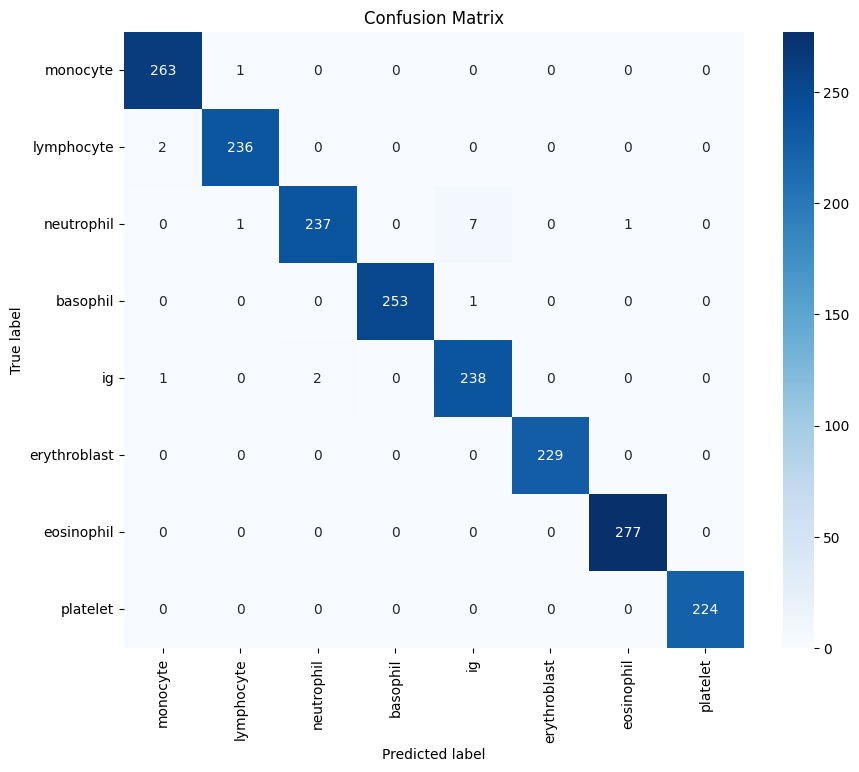

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Compute the confusion matrix
cm = confusion_matrix(actual_labels, preds_classes)

# Create a DataFrame from the confusion matrix
cm_df = pd.DataFrame(cm, index=classes, columns=classes)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

Text(0.5, 1.0, 'Training and loss curves InceptionV3')

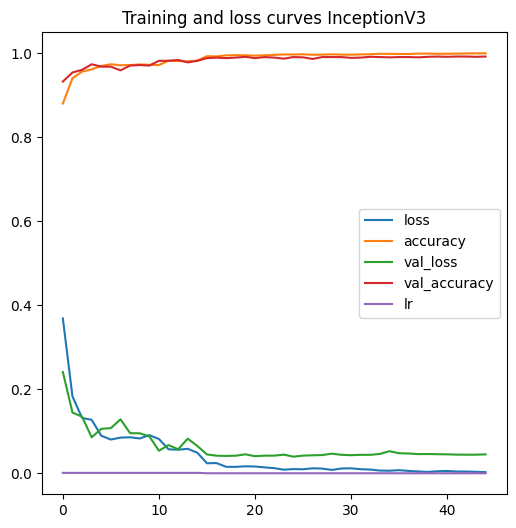

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history_inceptionV3_exp.history).plot(figsize=(6,6))
plt.title("Training and loss curves InceptionV3")

## End

## Our overall best model densenet 169 with 99.29 accuracy

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import DenseNet169
from tensorflow.keras.callbacks import LearningRateScheduler
# Load pre-trained DenseNet169 model
base_model = DenseNet169(include_top=False, weights='imagenet')
# Set the number of layers to unfreeze
for layer in base_model.layers:
    layer.trainable = True

# Input layer
inputs = keras.Input(shape=(224, 224, 3))

# Data augmentation
x = layers.experimental.preprocessing.RandomFlip("horizontal")(inputs)
x = layers.experimental.preprocessing.RandomFlip("vertical")(x)
x = layers.experimental.preprocessing.RandomRotation(60)(x)
# Center cropping
x = layers.experimental.preprocessing.CenterCrop(height=224, width=224)(x)

# Pass the augmented input through the base model
x = base_model(x, training=True)  # Set training to True for unfrozen layers

# Global average pooling and dense output layer
x = layers.GlobalAveragePooling2D()(x)
outputs = layers.Dense(8, activation="softmax")(x)

# Create the model
model = keras.Model(inputs, outputs)

# Define the learning rate schedule
def lr_schedule(epoch):
    if epoch < 7:
        return 0.001
    if epoch <13:
        return 0.0001
    else:
      return 0.00001

# Compile the model with Adam optimizer and custom learning rate
model.compile(optimizer=Adam(learning_rate=lr_schedule(0)), loss='categorical_crossentropy', metrics=['accuracy'])
# Define the learning rate scheduler callback
lr_scheduler = LearningRateScheduler(lr_schedule)
# Train the model for 15 epochs
history_densnet_exp = model.fit(train_data, train_labels, validation_data=(val_data, val_labels),
                    epochs=15, batch_size=32, callbacks=[lr_scheduler])

51877672/51877672 [==============================] - 0s 0us/step
Epoch 1/15
198/198 [==============================] - 146s 176ms/step - loss: 0.3001 - accuracy: 0.8978 - val_loss: 0.1841 - val_accuracy: 0.9443 - lr: 0.0010
Epoch 2/15
198/198 [==============================] - 27s 135ms/step - loss: 0.1541 - accuracy: 0.9487 - val_loss: 0.1474 - val_accuracy: 0.9500 - lr: 0.0010
Epoch 3/15
198/198 [==============================] - 27s 134ms/step - loss: 0.1254 - accuracy: 0.9613 - val_loss: 0.1194 - val_accuracy: 0.9639 - lr: 0.0010
Epoch 4/15
198/198 [==============================] - 27s 135ms/step - loss: 0.1431 - accuracy: 0.9523 - val_loss: 0.1269 - val_accuracy: 0.9576 - lr: 0.0010
Epoch 5/15
198/198 [==============================] - 27s 135ms/step - loss: 0.0966 - accuracy: 0.9696 - val_loss: 0.1212 - val_accuracy: 0.9664 - lr: 0.0010
Epoch 6/15
198/198 [==============================] - 27s 134ms/step - loss: 0.0957 - accuracy: 0.9666 - val_loss: 0.0826 - val_accuracy: 0.9747

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Get the predictions
preds = model.predict(test_data)
preds_classes = np.argmax(preds, axis=1)

# Get the actual labels
actual_labels = np.argmax(test_labels, axis=1)

# Print the classification report
print(classification_report(actual_labels, preds_classes, target_names=classes))

# Print the confusion matrix
print(confusion_matrix(actual_labels, preds_classes))

# Evaluate the model
loss, accuracy = model.evaluate(test_data, test_labels, verbose=0)
print("Test: accuracy = %f  ;  loss = %f" % (accuracy, loss))

62/62 [==============================] - 6s 41ms/step
              precision    recall  f1-score   support

    monocyte       0.99      1.00      0.99       264
  lymphocyte       1.00      1.00      1.00       238
  neutrophil       0.99      0.98      0.98       246
    basophil       1.00      1.00      1.00       254
          ig       0.98      0.98      0.98       241
erythroblast       1.00      1.00      1.00       229
  eosinophil       1.00      1.00      1.00       277
    platelet       1.00      1.00      1.00       224

    accuracy                           0.99      1973
   macro avg       0.99      0.99      0.99      1973
weighted avg       0.99      0.99      0.99      1973

[[263   1   0   0   0   0   0   0]
 [  1 237   0   0   0   0   0   0]
 [  1   0 241   0   3   0   1   0]
 [  0   0   0 253   1   0   0   0]
 [  2   0   3   0 236   0   0   0]
 [  0   0   0   0   0 229   0   0]
 [  0   0   0   1   0   0 276   0]
 [  0   0   0   0   0   0   0 224]]
Test: accuracy

In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
def sensitivity_specificity_accuracy(y_true, y_pred, classes):
    # Calculate the confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    metrics = []
    for i, class_ in enumerate(classes):
        TP = np.diag(cm)[i]
        FP = cm[:,i].sum() - TP
        FN = cm[i,:].sum() - TP
        TN = cm.sum() - (FP + FN + TP)

        sensitivity = TP / (TP + FN)
        specificity = TN / (TN + FP)
        accuracy = accuracy_score(y_true == i, y_pred == i)

        metrics.append([class_, sensitivity, specificity, accuracy])

    df = pd.DataFrame(metrics, columns=['Class', 'Sensitivity', 'Specificity', 'Accuracy'])
    return df

# Get the predictions
preds = model.predict(test_data)
preds_classes = np.argmax(preds, axis=1)

# Get the actual labels
actual_labels = np.argmax(test_labels, axis=1)

# Print the classification report
print(classification_report(actual_labels, preds_classes, target_names=classes))

# Print the confusion matrix
print(confusion_matrix(actual_labels, preds_classes))
# Print sensitivity, specificity, and accuracy
df_metrics = sensitivity_specificity_accuracy(actual_labels, preds_classes, classes)
print(df_metrics)
# Evaluate the model
loss, accuracy = model.evaluate(test_data, test_labels, verbose=0)
print("Test: accuracy = %f  ;  loss = %f" % (accuracy, loss))

62/62 [==============================] - 2s 38ms/step
              precision    recall  f1-score   support

    monocyte       0.99      1.00      0.99       264
  lymphocyte       1.00      1.00      1.00       238
  neutrophil       0.99      0.98      0.98       246
    basophil       1.00      1.00      1.00       254
          ig       0.98      0.98      0.98       241
erythroblast       1.00      1.00      1.00       229
  eosinophil       1.00      1.00      1.00       277
    platelet       1.00      1.00      1.00       224

    accuracy                           0.99      1973
   macro avg       0.99      0.99      0.99      1973
weighted avg       0.99      0.99      0.99      1973

[[263   1   0   0   0   0   0   0]
 [  1 237   0   0   0   0   0   0]
 [  1   0 241   0   3   0   1   0]
 [  0   0   0 253   1   0   0   0]
 [  2   0   3   0 236   0   0   0]
 [  0   0   0   0   0 229   0   0]
 [  0   0   0   1   0   0 276   0]
 [  0   0   0   0   0   0   0 224]]
          Clas

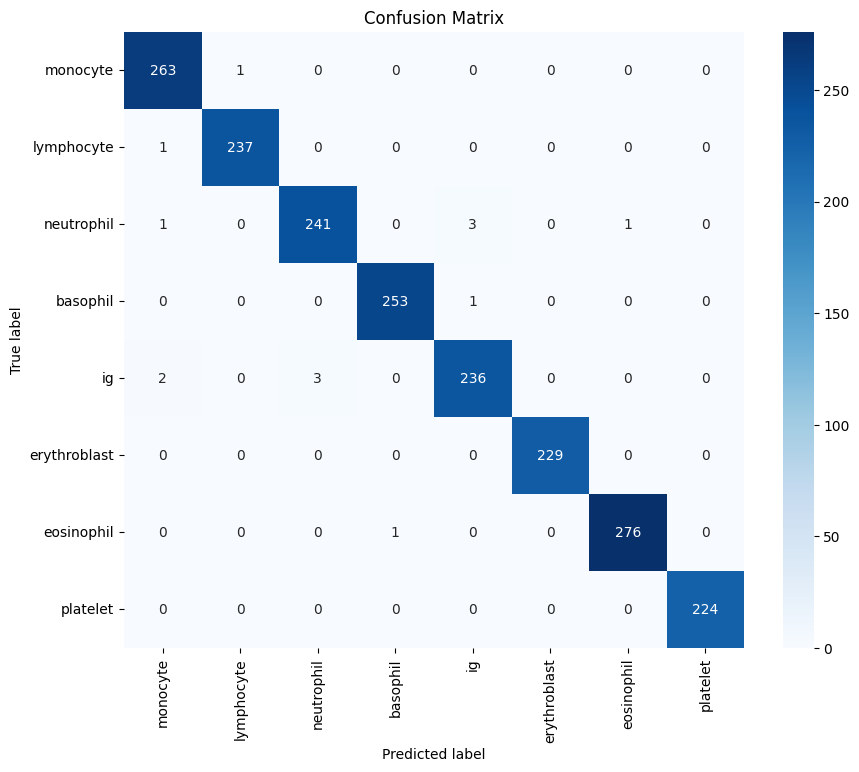

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Compute the confusion matrix
cm = confusion_matrix(actual_labels, preds_classes)

# Create a DataFrame from the confusion matrix
cm_df = pd.DataFrame(cm, index=classes, columns=classes)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

Text(0.5, 1.0, 'Training and loss curves InceptionV3')

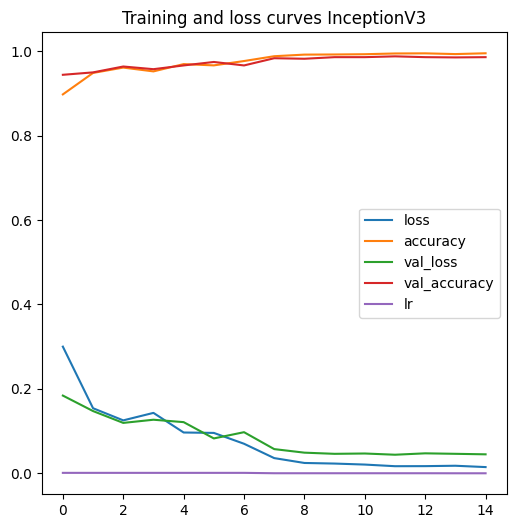

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history_densnet_exp.history).plot(figsize=(6,6))
plt.title("Training and loss curves DenseNet 169")

In [ ]:
model.save("/content/drive/MyDrive/densenet_final1_10_l25_.h5")

In [ ]:
import numpy as np
from keras.models import load_model
from sklearn.metrics import accuracy_score

## DenseNet 201

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.callbacks import LearningRateScheduler
# Load pre-trained DenseNet201 model
base_model = DenseNet201(include_top=False, weights='imagenet')
# Set the number of layers to unfreeze
for layer in base_model.layers:
    layer.trainable = True

# Input layer
inputs = keras.Input(shape=(224, 224, 3))

# Data augmentation
x = layers.experimental.preprocessing.RandomFlip("horizontal")(inputs)
x = layers.experimental.preprocessing.RandomFlip("vertical")(x)
x = layers.experimental.preprocessing.RandomRotation(60)(x)
# Center cropping
x = layers.experimental.preprocessing.CenterCrop(height=224, width=224)(x)

# Pass the augmented input through the base model
x = base_model(x, training=True)  # Set training to True for unfrozen layers

# Global average pooling and dense output layer
x = layers.GlobalAveragePooling2D()(x)
outputs = layers.Dense(8, activation="softmax")(x)

# Create the model
model = keras.Model(inputs, outputs)

# Define the learning rate schedule
def lr_schedule(epoch):
    if epoch < 7:
        return 0.001
    if epoch <13:
        return 0.0001
    else:
      return 0.00001

# Compile the model with Adam optimizer and custom learning rate
model.compile(optimizer=Adam(learning_rate=lr_schedule(0)), loss='categorical_crossentropy', metrics=['accuracy'])
# Define the learning rate scheduler callback
lr_scheduler = LearningRateScheduler(lr_schedule)
# Train the model for 15 epochs
history_densnet_exp = model.fit(train_data, train_labels, validation_data=(val_data, val_labels),
                    epochs=15, batch_size=32, callbacks=[lr_scheduler])

Epoch 1/15
198/198 [==============================] - 146s 182ms/step - loss: 0.3221 - accuracy: 0.8899 - val_loss: 0.2428 - val_accuracy: 0.9253 - lr: 0.0010
Epoch 2/15
198/198 [==============================] - 32s 161ms/step - loss: 0.1621 - accuracy: 0.9469 - val_loss: 0.1625 - val_accuracy: 0.9474 - lr: 0.0010
Epoch 3/15
198/198 [==============================] - 32s 161ms/step - loss: 0.1129 - accuracy: 0.9653 - val_loss: 0.0787 - val_accuracy: 0.9753 - lr: 0.0010
Epoch 4/15
198/198 [==============================] - 32s 161ms/step - loss: 0.1078 - accuracy: 0.9651 - val_loss: 0.1725 - val_accuracy: 0.9360 - lr: 0.0010
Epoch 5/15
198/198 [==============================] - 32s 160ms/step - loss: 0.0951 - accuracy: 0.9661 - val_loss: 0.0643 - val_accuracy: 0.9823 - lr: 0.0010
Epoch 6/15
198/198 [==============================] - 32s 160ms/step - loss: 0.0823 - accuracy: 0.9712 - val_loss: 0.1496 - val_accuracy: 0.9538 - lr: 0.0010
Epoch 7/15
198/198 [==============================]

In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
def sensitivity_specificity_accuracy(y_true, y_pred, classes):
    # Calculate the confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    metrics = []
    for i, class_ in enumerate(classes):
        TP = np.diag(cm)[i]
        FP = cm[:,i].sum() - TP
        FN = cm[i,:].sum() - TP
        TN = cm.sum() - (FP + FN + TP)

        sensitivity = TP / (TP + FN)
        specificity = TN / (TN + FP)
        accuracy = accuracy_score(y_true == i, y_pred == i)

        metrics.append([class_, sensitivity, specificity, accuracy])

    df = pd.DataFrame(metrics, columns=['Class', 'Sensitivity', 'Specificity', 'Accuracy'])
    return df

# Get the predictions
preds = model.predict(test_data)
preds_classes = np.argmax(preds, axis=1)

# Get the actual labels
actual_labels = np.argmax(test_labels, axis=1)

# Print the classification report
print(classification_report(actual_labels, preds_classes, target_names=classes))

# Print the confusion matrix
print(confusion_matrix(actual_labels, preds_classes))

# Print sensitivity, specificity, and accuracy
df_metrics = sensitivity_specificity_accuracy(actual_labels, preds_classes, classes)
print(df_metrics)
# Evaluate the model
loss, accuracy = model.evaluate(test_data, test_labels, verbose=0)
print("Test: accuracy = %f  ;  loss = %f" % (accuracy, loss))

62/62 [==============================] - 9s 49ms/step
              precision    recall  f1-score   support

    monocyte       0.99      0.99      0.99       264
  lymphocyte       1.00      1.00      1.00       238
  neutrophil       0.99      0.97      0.98       246
    basophil       1.00      1.00      1.00       254
          ig       0.97      0.98      0.97       241
erythroblast       1.00      1.00      1.00       229
  eosinophil       1.00      1.00      1.00       277
    platelet       1.00      1.00      1.00       224

    accuracy                           0.99      1973
   macro avg       0.99      0.99      0.99      1973
weighted avg       0.99      0.99      0.99      1973

[[262   1   0   0   1   0   0   0]
 [  1 237   0   0   0   0   0   0]
 [  1   0 239   0   5   0   1   0]
 [  0   0   0 253   1   0   0   0]
 [  1   0   3   1 236   0   0   0]
 [  0   0   0   0   0 229   0   0]
 [  0   0   0   0   1   0 276   0]
 [  0   0   0   0   0   0   0 224]]
          Clas